In [1]:
print("Hello, Begin Your Data Journey")


Hello, Begin Your Data Journey


# Optimizing Loan Approval Predictions Using Gaussian Naive Bayes:

You are working as a data scientist at a financial institution that specializes in providing loans to individuals. The company has gathered a large dataset of loan applicants, which includes features such as age, income, credit score, and education level. The company wants to predict whether a loan applicant will be approved or denied based on their profile. By building a machine learning model, the company aims to streamline the loan approval process and improve the accuracy of its decisions.

The model you are tasked with building needs to be both interpretable and efficient, as it will be used in a production environment to process hundreds of applications daily. Your first approach involves using a Gaussian Naive Bayes model due to its simplicity and interpretability. You will evaluate the model, tune its hyperparameters, and assess its final performance.
 

Scenario:

As a data scientist at the financial institution, your goal is to automate the loan approval process using a Gaussian Naive Bayes classifier to predict loan approval decisions. You have access to a dataset containing features such as age, income, credit score, and education level, along with the target variable Loan_Approval (1 for approval, 0 for rejection).

You are required to:

1. Understand the Data:

 * Handle missing values for features like age and income using appropriate imputation techniques.
 * Perform exploratory data analysis (EDA) to understand the distribution of key variables like age, income, and credit score. Generate visualizations to highlight patterns in the data.
 * Analyze the distribution of loan approvals to check for class imbalances.

2. Data Preprocessing:

 * Normalize continuous variables such as age, income, and credit score to ensure the model performs optimally.
 * Split the dataset into training (80%) and testing (20%) sets to evaluate the model's performance on unseen data.

3. Model Building and Evaluation:

 * Train a Gaussian Naive Bayes classifier on the training data and make predictions on the test set.
 * Evaluate the model's performance using metrics such as accuracy, precision, recall, F1 and the confusion matrix. Provide a detailed interpretation of the results.

In [2]:
!pip3 install matplotlib
!pip3 install sklearn
!pip3 install seaborn


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,f1_score
import json
import os
import warnings
warnings.filterwarnings("ignore")

jupyter_notebook_dataset = os.getenv("dataset_url", "https://d3dyfaf3iutrxo.cloudfront.net/general/upload/708bab63dc51427398188f0524ad25ad.csv")
data = pd.read_csv(jupyter_notebook_dataset)


Matplotlib is building the font cache; this may take a moment.


In [7]:
data

,Age,Income,Credit_Score,Education_Level,Loan_Approval
0,41.478261,29000.0,558,1,0
1,46.000000,95588.0,309,1,0
2,32.000000,118610.0,560,4,0
3,60.000000,63304.0,471,3,0
4,25.000000,94449.0,312,2,0
...,...,...,...,...,...
495,41.478261,67533.0,594,1,0
496,41.000000,26828.0,523,3,0
497,29.000000,26917.0,824,1,0
498,52.000000,45618.0,345,1,0


In [8]:
# Display the first 5 rows of the dataset to understand its structure
data.head()


,Age,Income,Credit_Score,Education_Level,Loan_Approval
0,41.478261,29000.0,558,1,0
1,46.000000,95588.0,309,1,0
2,32.000000,118610.0,560,4,0
3,60.000000,63304.0,471,3,0
4,25.000000,94449.0,312,2,0


In [9]:
# Display the shape of the dataset to check how many rows and columns it has
data.shape


(500, 5)

In [10]:
# Check for missing values in the dataset
data.isnull().sum()


Age                0
Income             0
Credit_Score       0
Education_Level    0
Loan_Approval      0
dtype: int64

In [11]:
# Handle missing values (mean imputation for Age and Income)
# If there are any missing values in any columns, fill them with the mean of that column.
data.fillna(value = {'Age' : data['Age'].mean(), 'Income' : data['Income'].mean()}, inplace = True )




In [12]:
# Exploratory Data Analysis (EDA)
# Summary statistics: Provides a summary of basic statistics for each feature, such as mean, median, and standard deviation.
data.describe()


,Age,Income,Credit_Score,Education_Level,Loan_Approval
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,41.478261,70740.529787,564.184000,2.524000,0.136000
std,12.780777,27263.305792,158.249892,1.129591,0.343132
min,18.000000,25055.000000,300.000000,1.000000,0.000000
25%,32.000000,47970.750000,431.750000,2.000000,0.000000
50%,41.478261,70740.529787,566.500000,2.500000,0.000000
75%,51.250000,94241.250000,693.250000,4.000000,0.000000
max,64.000000,119456.000000,849.000000,4.000000,1.000000


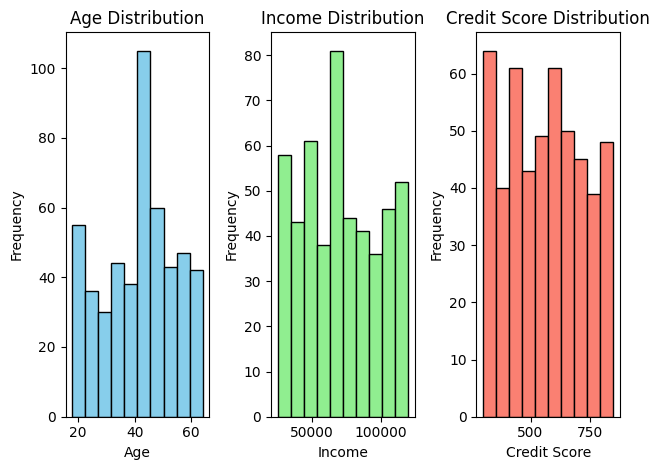

In [13]:
# Visualizations: Histograms for continuous variables (Age, Income, Credit_Score)
# This helps in understanding the distribution of continuous variables.

# Histogram for Age
plt.subplot(1, 3, 1)
plt.hist(data["Age"].dropna(), bins=10, color="skyblue", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Histogram for Income
plt.subplot(1, 3, 2)
plt.hist(data["Income"], bins=10, color="lightgreen", edgecolor="black")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")

# Histogram for Credit Score
plt.subplot(1, 3, 3)
plt.hist(data["Credit_Score"], bins=10, color="salmon", edgecolor="black")
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [14]:
# Display the class balance numerically
# This prints the proportion of approved vs. denied loans in the dataset.
# store it in variable 'class_balance'

data['Loan_Approval'].value_counts()


Loan_Approval
0    432
1     68
Name: count, dtype: int64

In [15]:
# Data Preprocessing
# Separate features and target: Drop the 'Loan_Approval' column from the features (X) and store it as the target (y)
X = data.iloc[:, :-1] 
y = data.iloc[:, -1]


In [16]:
# Split the dataset into training (80%) and testing (20%) sets
# keep the random_state=42 and stratify=y

from sklearn.model_selection import train_test_split 


X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
X_train


,Age,Income,Credit_Score,Education_Level
249,56.0,33702.0,340,3
433,43.0,37910.0,459,1
19,61.0,100353.0,812,3
322,38.0,78413.0,499,1
332,34.0,112369.0,700,1
...,...,...,...,...
106,52.0,97267.0,706,1
270,26.0,63765.0,811,4
348,38.0,31090.0,458,1
435,26.0,102735.0,388,3


In [18]:
# Scale the continuous variables (Age, Income, Credit_Score) using StandardScaler
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train_scaled = sc.fit_transform(X_train) 
X_test_scaled = sc.transform(X_test)


In [19]:
# Initialize and train the Gaussian Naive Bayes model
# Gaussian Naive Bayes is used for continuous data, assuming the features follow a normal distribution.
NB_model = GaussianNB()

# Train the model on the training data
NB_model.fit(X_train_scaled,y_train)



GaussianNB()

In [20]:
# Model Prediction and Evaluation (Before Tuning)
# Make predictions on the test data
y_pred = NB_model.predict(X_test_scaled)


In [21]:
# Create a function that returns the accuracy
# call this function and store it in variable 'accuracy'
def get_accuracy():
    ans = accuracy_score(y_test, y_pred)
    return ans  # replace with actual accuracy


In [22]:
accuracy = get_accuracy()
accuracy


0.95

In [23]:
# Evaluation before hyperparameter tuning
# Calculate precision, recall, confusion matrix
# store it in variable 'precision' , 'recall' & 'conf_matrix' respectively  

precision=precision_score(y_test, y_pred) 

recall = recall_score(y_test, y_pred) 
conf_matrix = confusion_matrix(y_test, y_pred)

